**Import Libraries**

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

**Import Data**

In [4]:
df=pd.read_csv('weatherAUS.csv')

In [5]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


**Exploratory Data Analysis**

**'Statistical Analysis'**

In [6]:
#check the shape of the dataframe
df.shape 

(145460, 23)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [8]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [9]:
df.describe(include="O")

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2013-11-12,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


In [10]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [11]:
df.duplicated().sum()

0

In [12]:
df.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RainTomorrow        2
dtype: int64

In [13]:
df.RainTomorrow.value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

**'Visualization Analysis'**

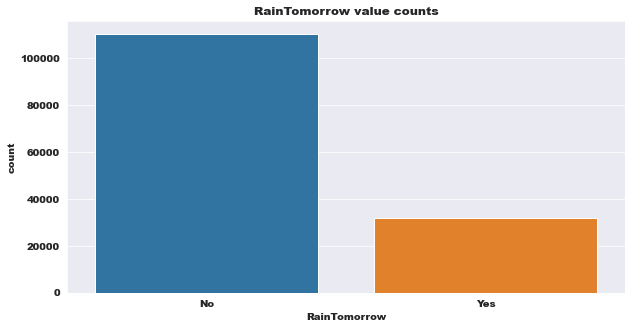

In [14]:
plt.figure(figsize=(10,5))
sns.set_style("darkgrid")
plt.title('RainTomorrow value counts')
sns.countplot(x=df["RainTomorrow"]);

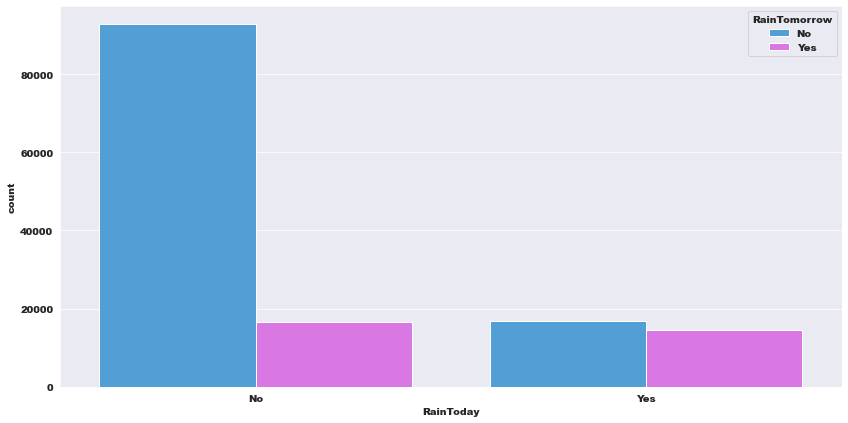

In [15]:
plt.figure(figsize=(14,7))
sns.countplot(x=df["RainToday"], hue=df["RainTomorrow"], palette=sns.color_palette("husl")[4:]);

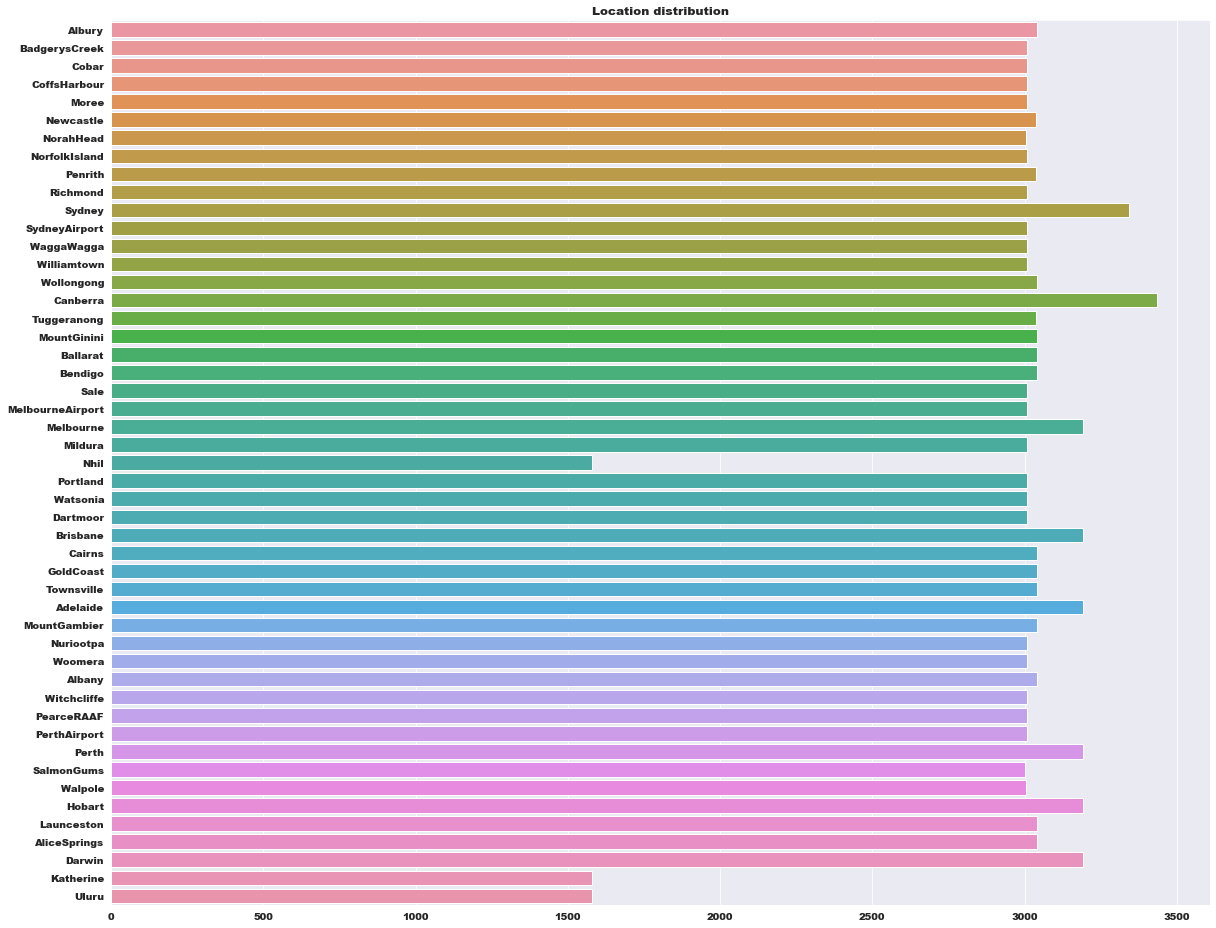

In [16]:
plt.figure(figsize=(17,13))
sns.countplot(data=df, y='Location')

plt.title('Location distribution')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

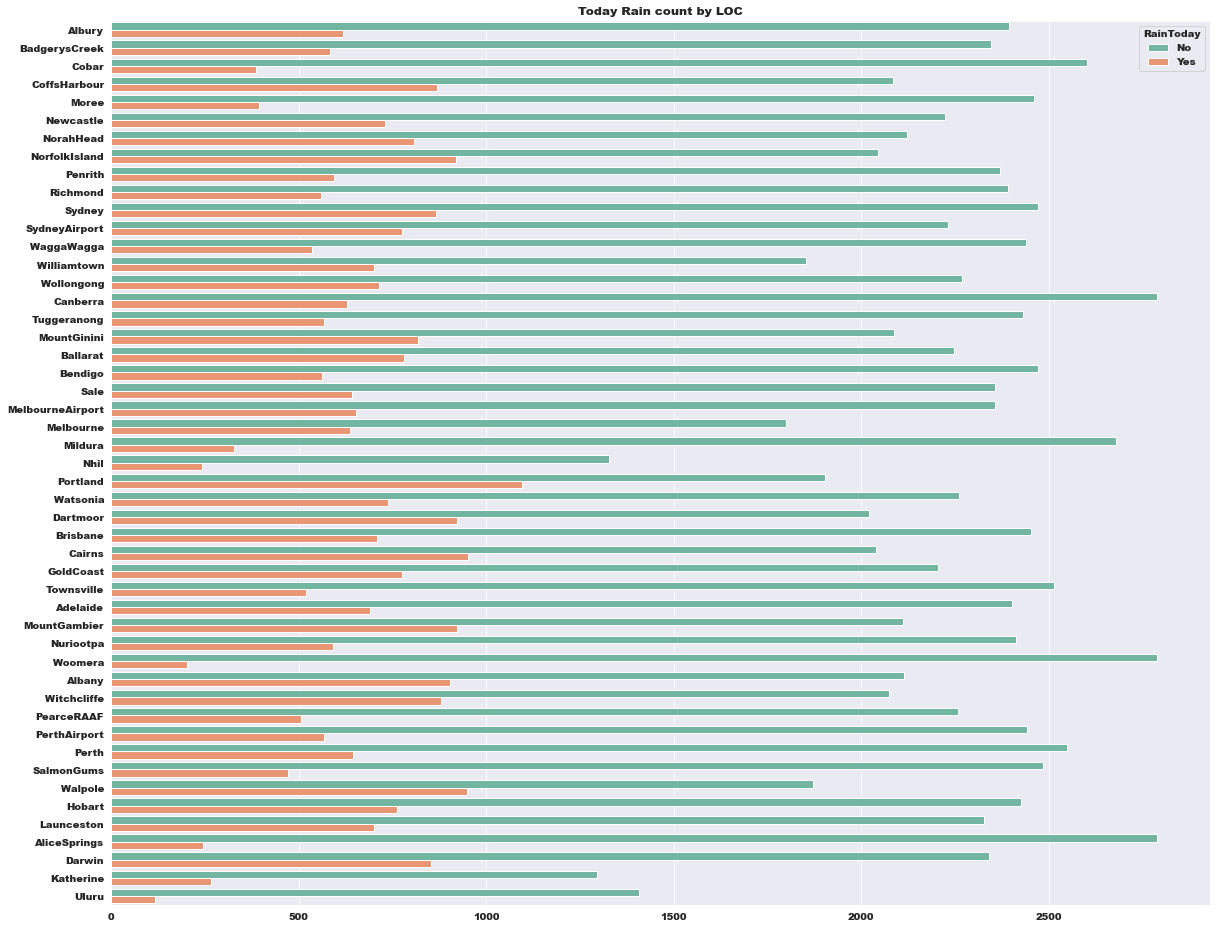

In [17]:
plt.figure(figsize=(17,13))
sns.countplot(data=df, y='Location', hue="RainToday", palette=sns.color_palette("Set2"))

plt.title('Today Rain count by LOC')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

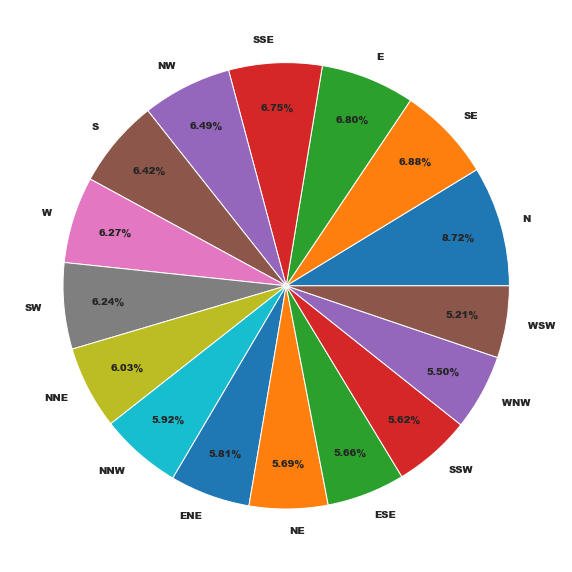

In [18]:
plt.figure(figsize=(10,11))
plt.pie(df["WindDir9am"].value_counts(),
        labels=list(df["WindDir9am"].value_counts().index),
        autopct='%1.2f%%',
        pctdistance=0.8,
       );

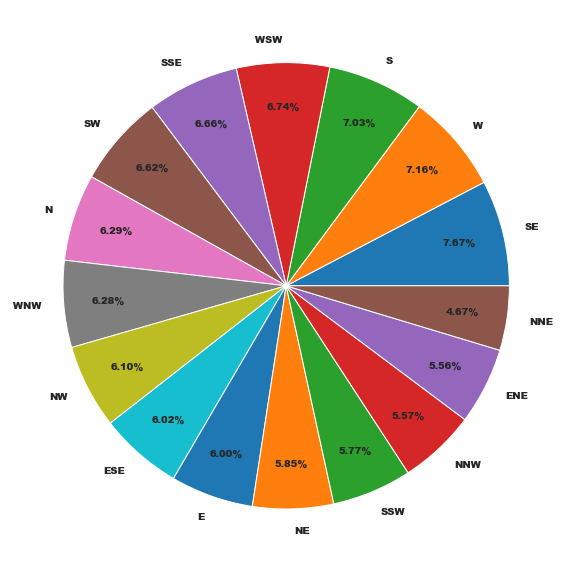

In [19]:
plt.figure(figsize=(10,11))
plt.pie(df["WindDir3pm"].value_counts(),
        labels=list(df["WindDir3pm"].value_counts().index),
        autopct='%1.2f%%',
        pctdistance=0.8,
       );

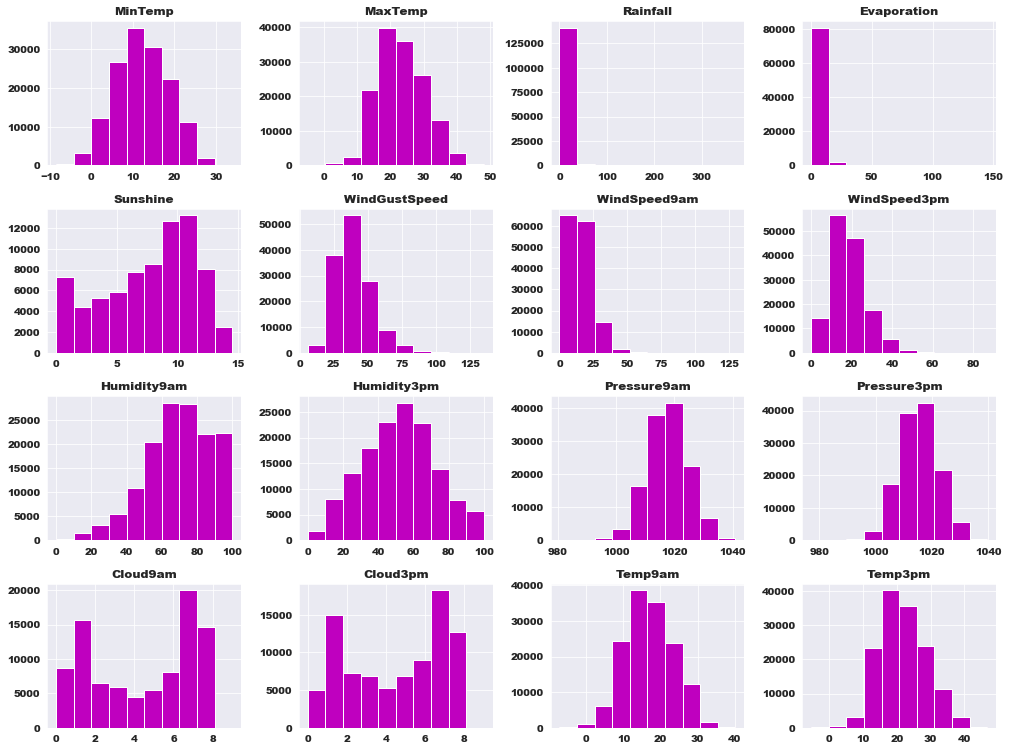

In [20]:
df.hist(figsize=(17,13), color="m");

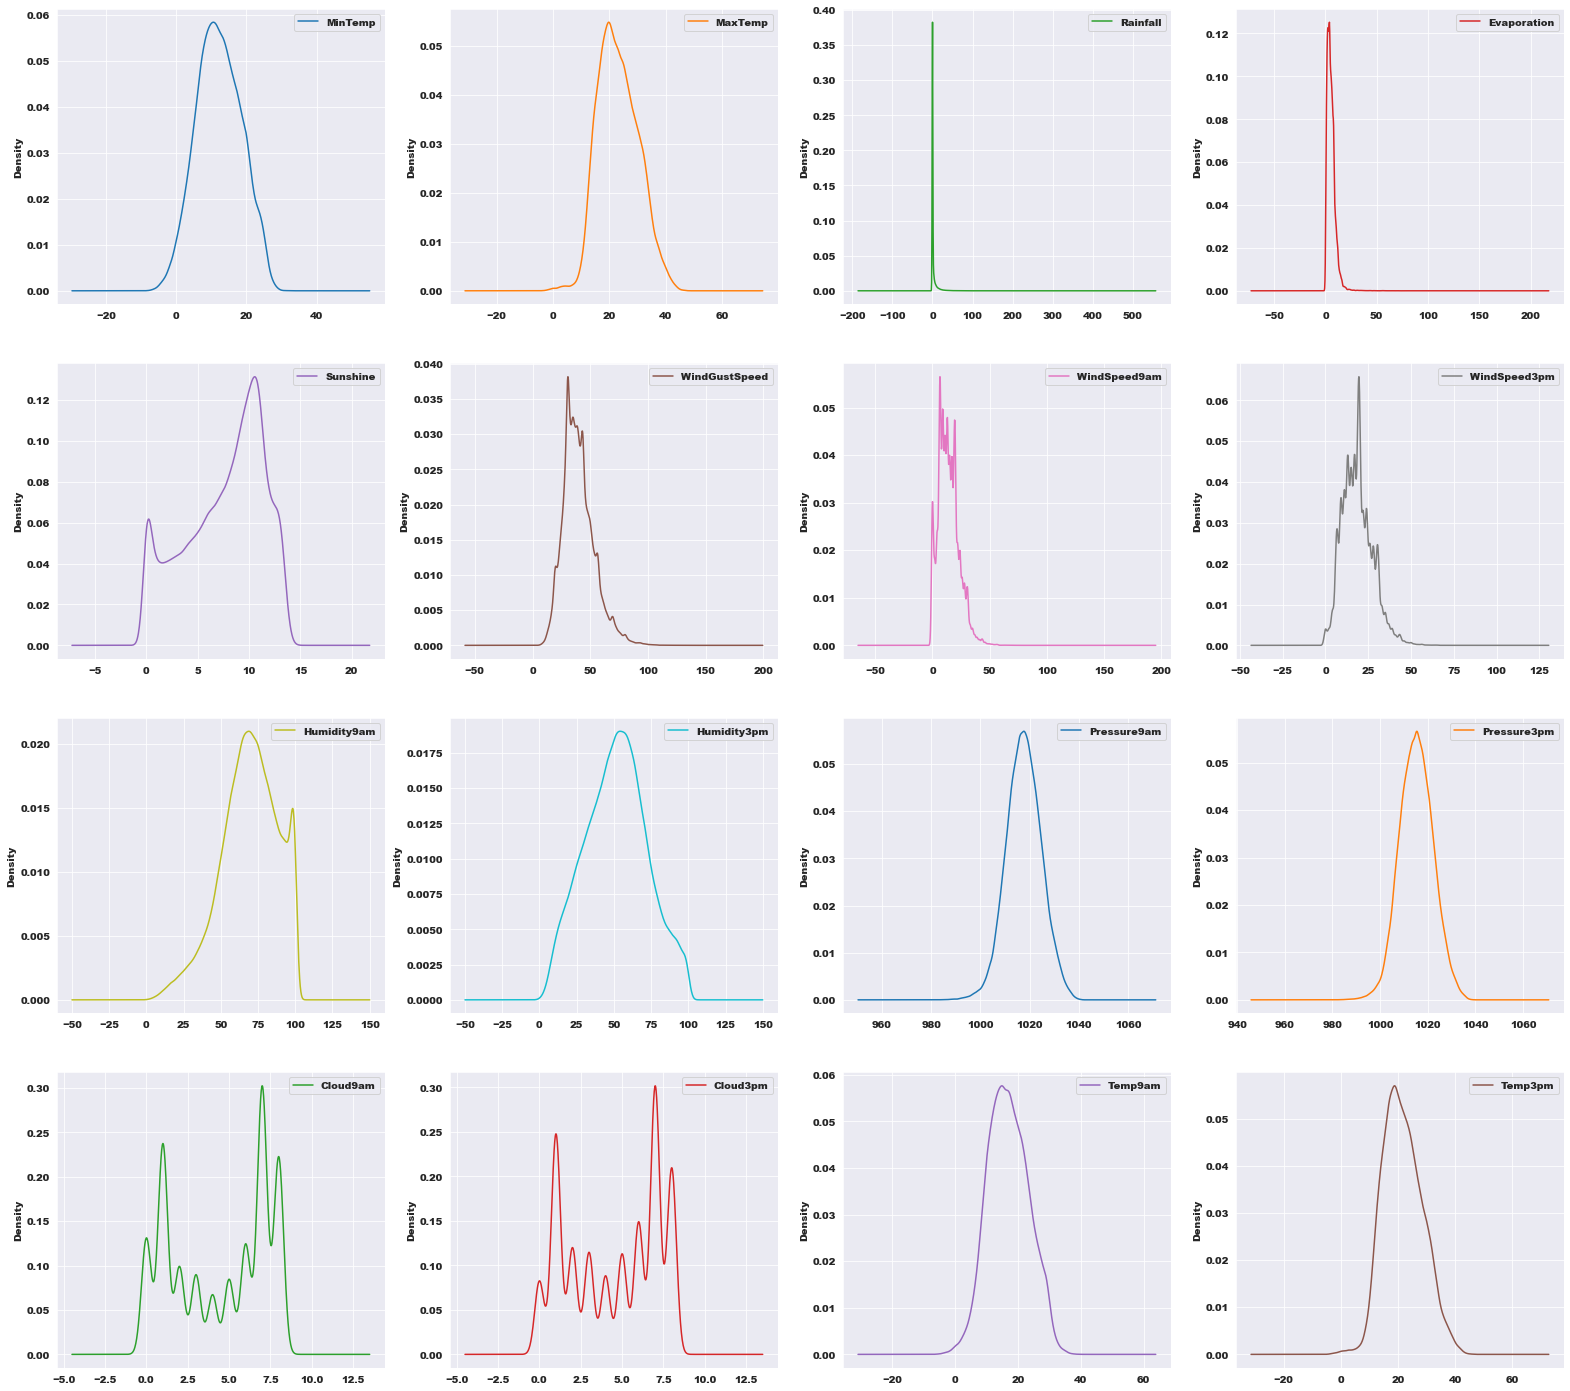

In [21]:
df.plot(kind="kde", subplots=True, layout=(4,4), figsize=(27,25),sharex=False, sharey=False);

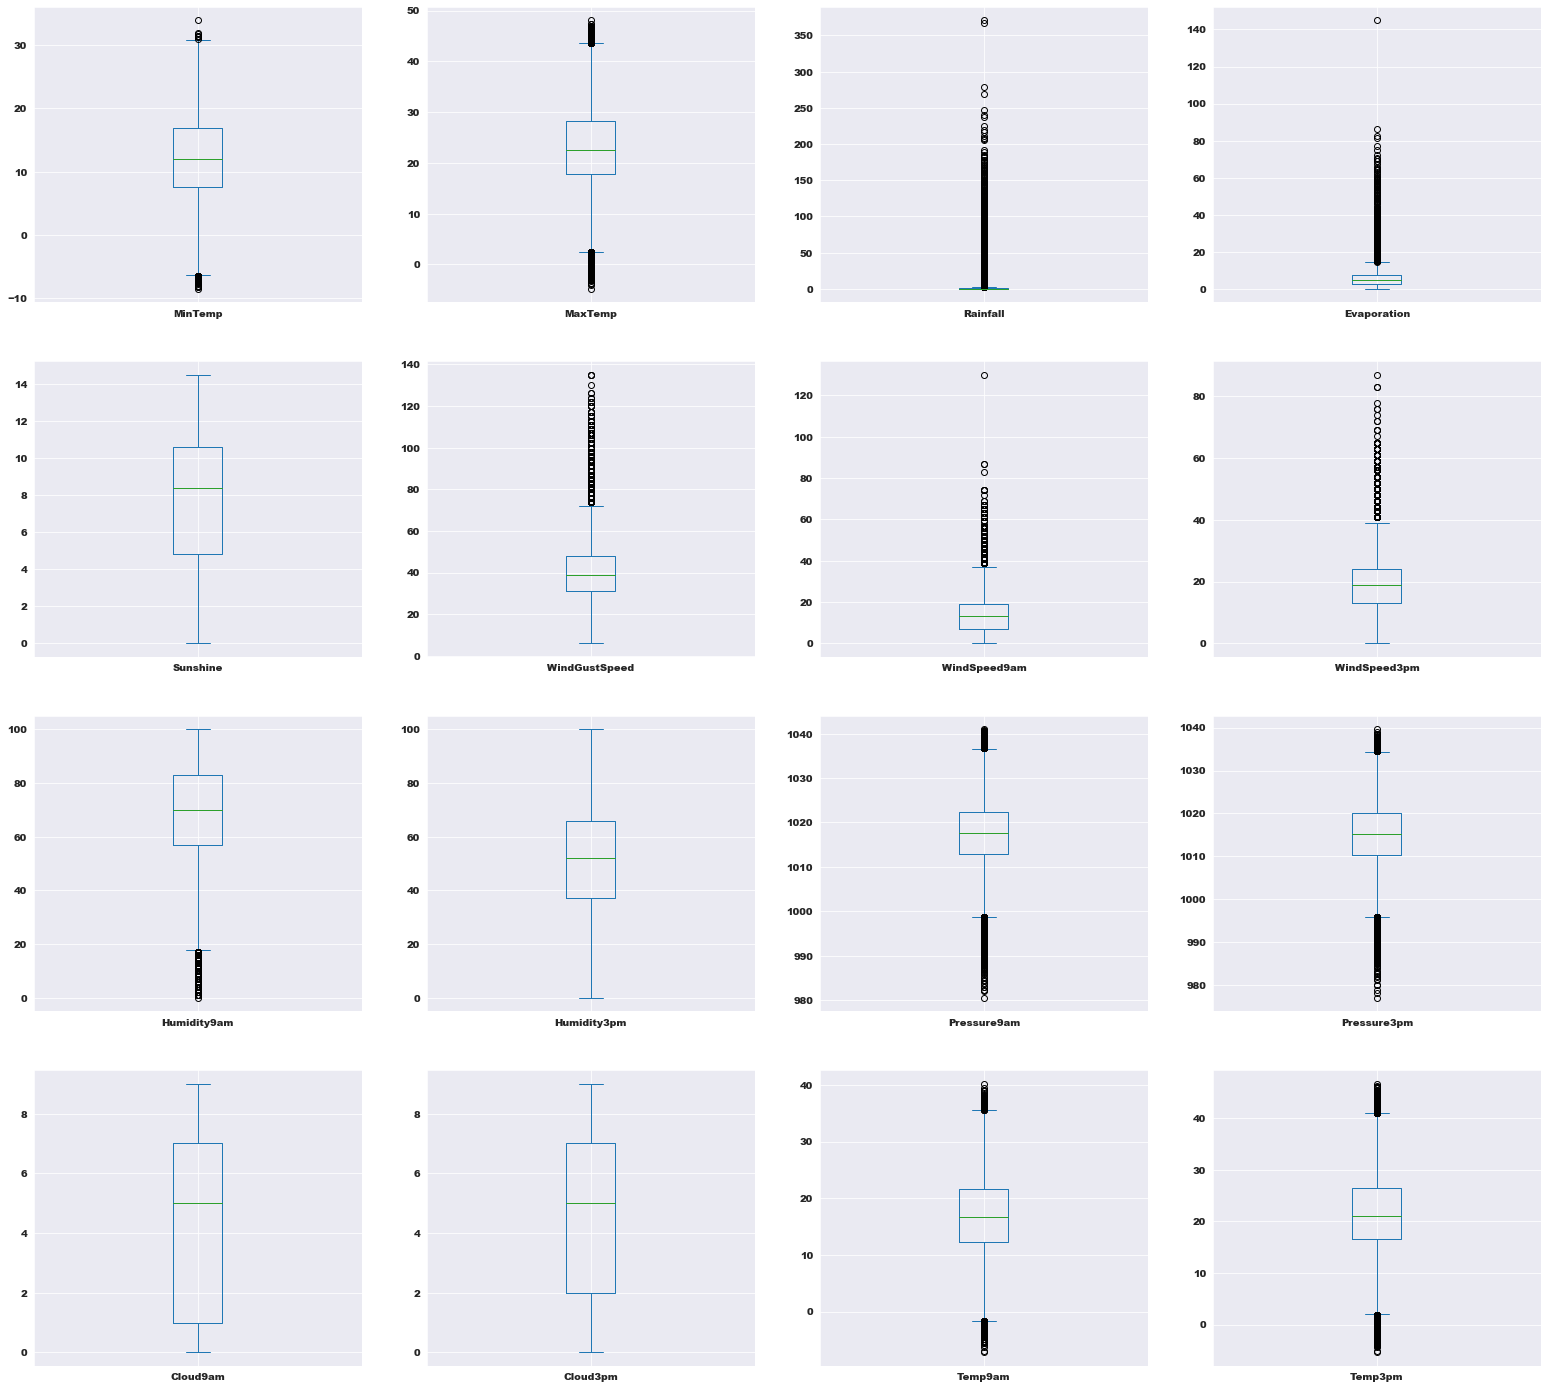

In [22]:
df.plot(kind="box", subplots=True, layout=(4,4), figsize=(27,25),sharex=False, sharey=False);

**'Multivariate'**

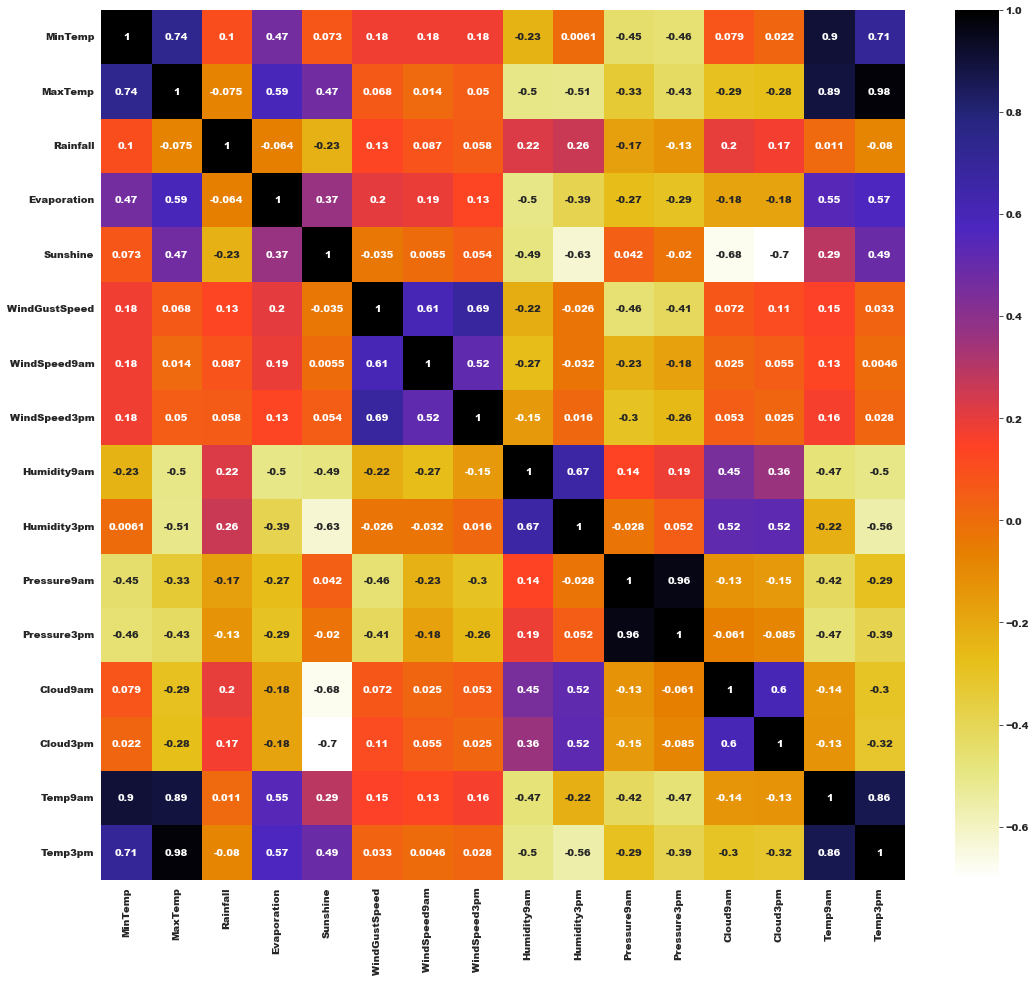

In [23]:
plt.figure(figsize=(18,16))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.CMRmap_r);

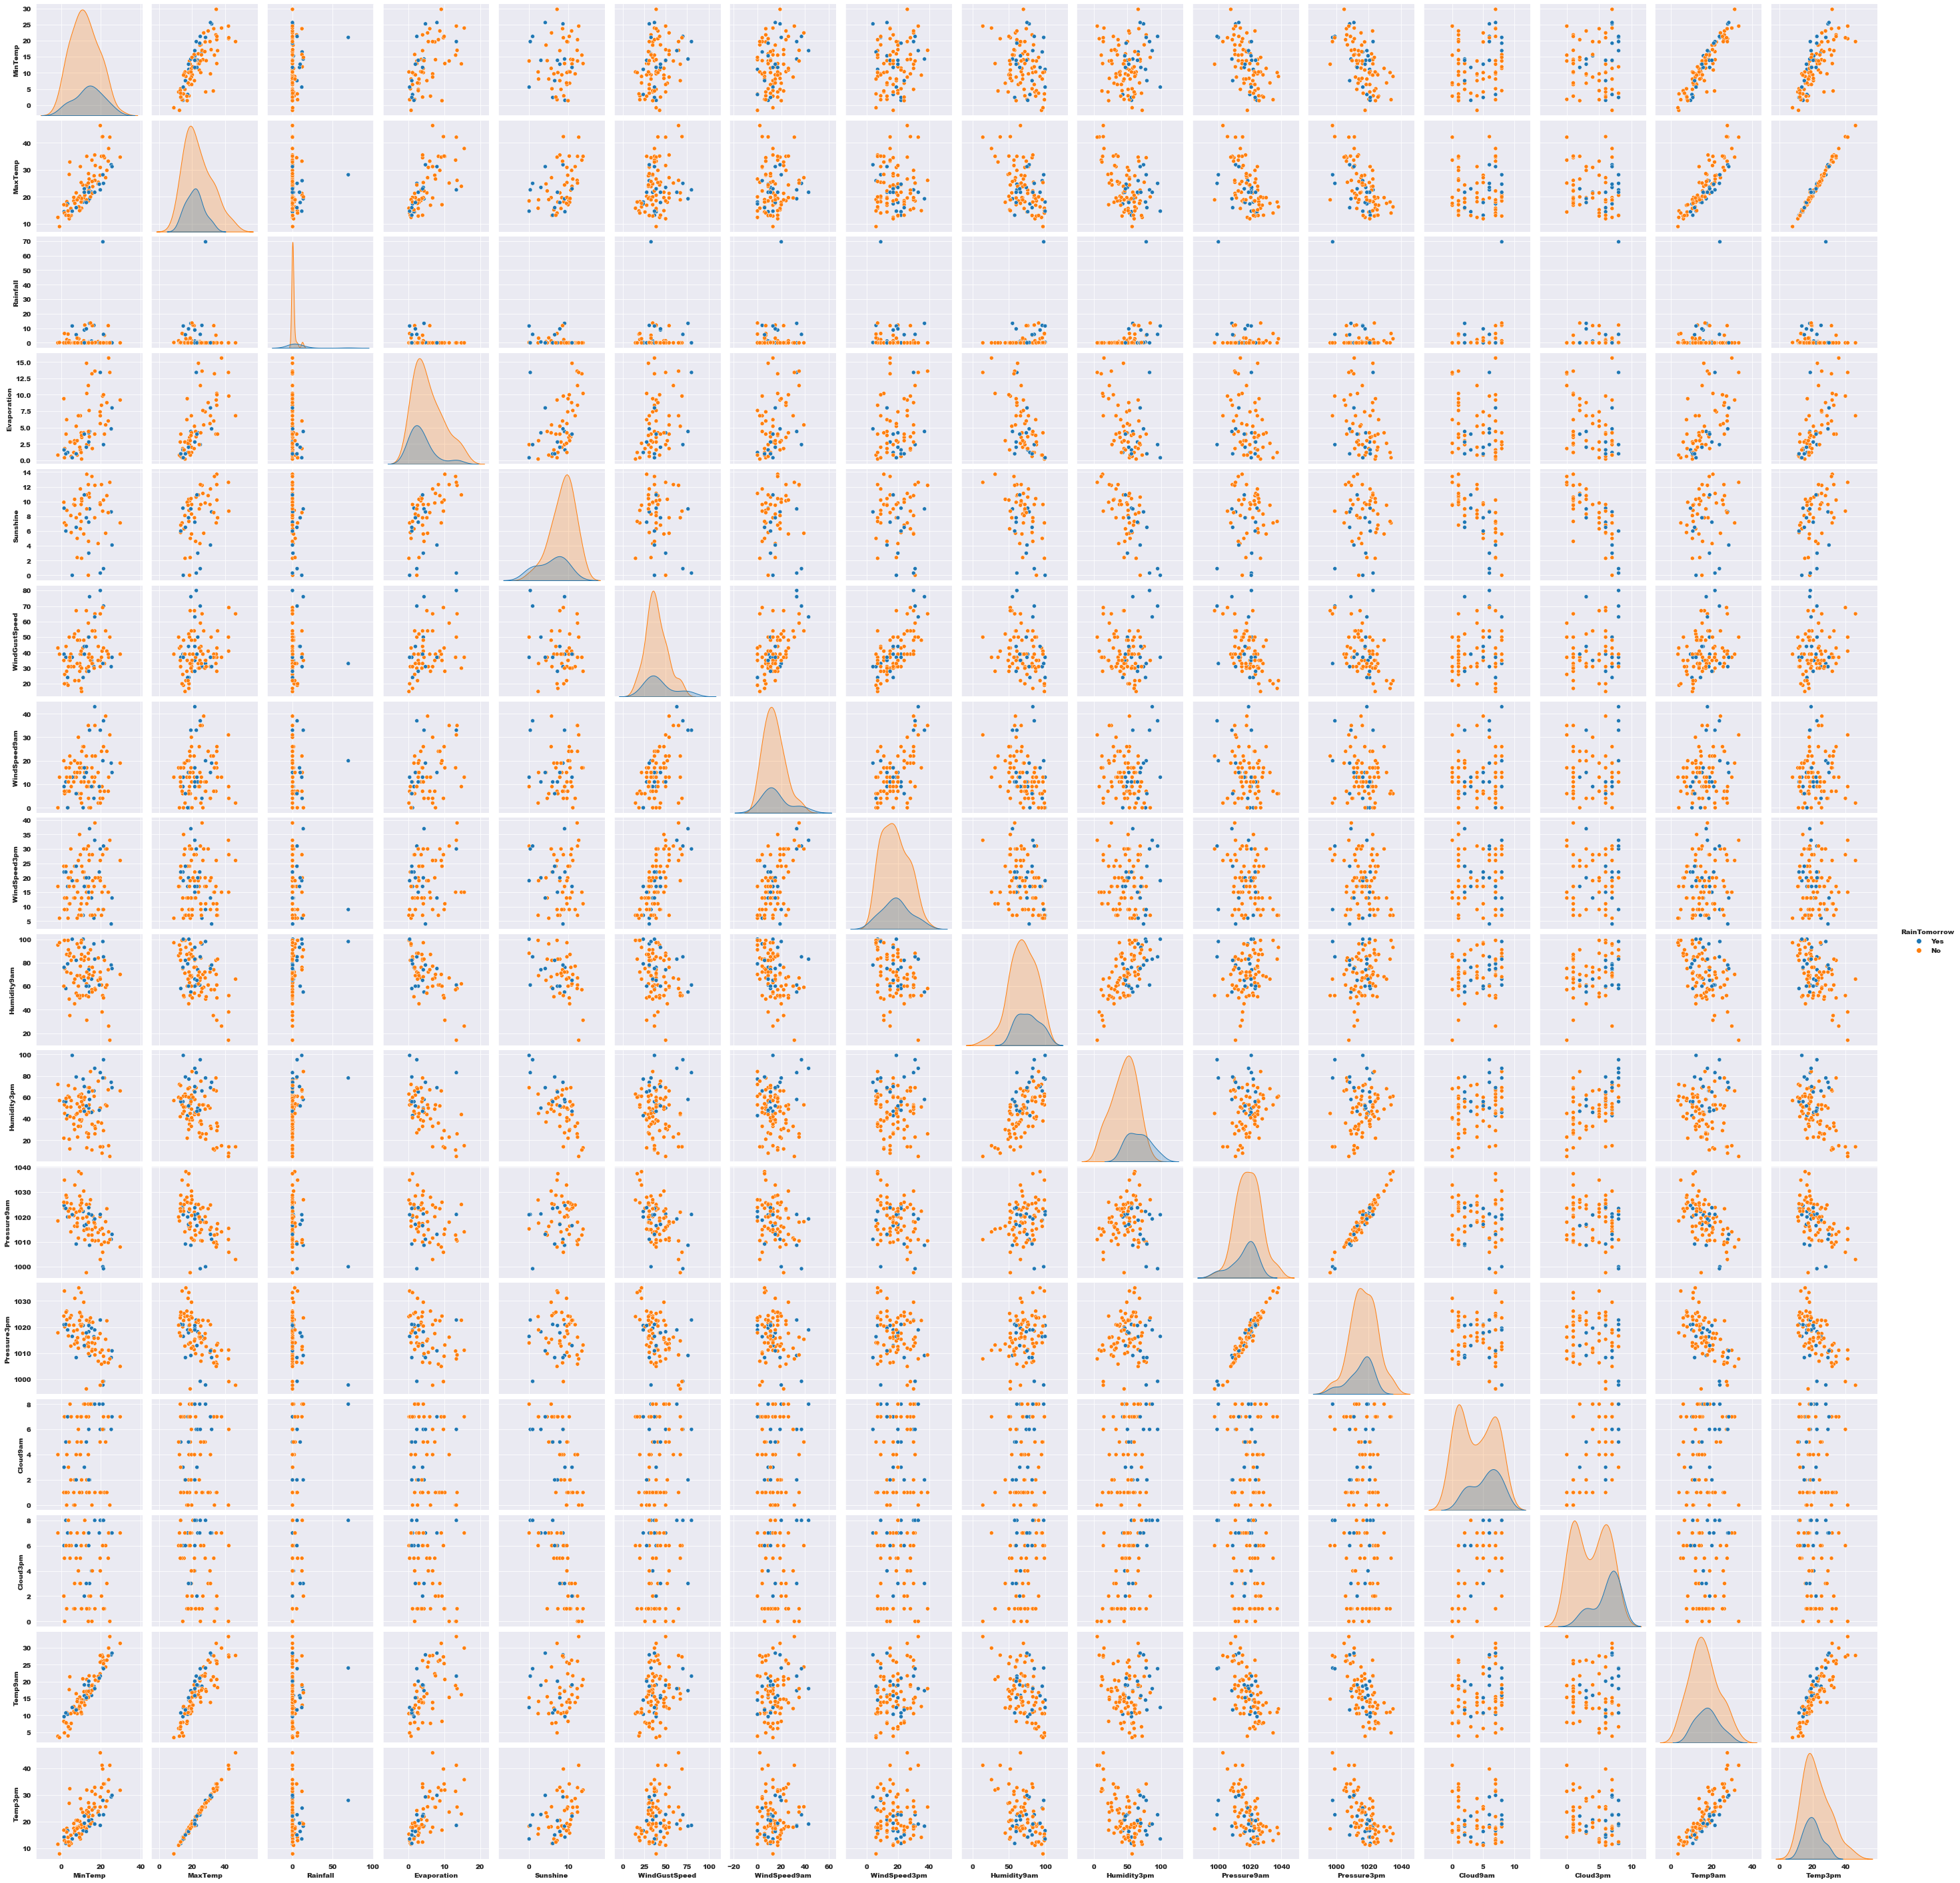

In [24]:
sns.pairplot(df.sample(n=100), hue="RainTomorrow");

**Preprocessing**

In [25]:
df_preprocessed = df.copy()

In [26]:
df_preprocessed.isnull().mean() * 100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [27]:
mean = df_preprocessed.mean()
df_preprocessed.fillna(mean, inplace=True)

df_preprocessed.isna().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir      10326
WindGustSpeed        0
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday         3261
RainTomorrow      3267
dtype: int64

In [28]:
df_preprocessed.replace(np.nan, 'NaN', inplace=True)
df_preprocessed.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [29]:
df_preprocessed.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.468232,7.611178,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,5.468232,7.611178,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,5.468232,7.611178,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,5.468232,7.611178,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.468232,7.611178,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No


In [30]:
df_preprocessed['Date'] = pd.to_datetime(df_preprocessed['Date'])

In [31]:
#columns segregation
date_columns = ['Date']
cat_columns = df_preprocessed.select_dtypes(include=['object']).columns
num_columns = df_preprocessed.select_dtypes(include=['float64', 'int64']).columns
target_col = 'RainTomorrow'

**encoding the categorical variables**

In [32]:
df_preprocessed.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.468232,7.611178,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,5.468232,7.611178,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,5.468232,7.611178,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,5.468232,7.611178,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.468232,7.611178,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No


In [33]:
cat_columns

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')

In [34]:
for i in cat_columns:
    print('Unique Values in ' + i + ' Column:', end = " ")
    print(len(df_preprocessed[i].unique()))
    print('-----------------------------------------------------')

Unique Values in Location Column: 49
-----------------------------------------------------
Unique Values in WindGustDir Column: 17
-----------------------------------------------------
Unique Values in WindDir9am Column: 17
-----------------------------------------------------
Unique Values in WindDir3pm Column: 17
-----------------------------------------------------
Unique Values in RainToday Column: 3
-----------------------------------------------------
Unique Values in RainTomorrow Column: 3
-----------------------------------------------------


In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in ['Location','WindGustDir','WindDir9am','WindDir3pm']:
    df_preprocessed[i] = le.fit_transform(df_preprocessed[i])
df_preprocessed.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,2,13.4,22.9,0.6,5.468232,7.611178,14,44.0,14,15,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No,No
1,2008-12-02,2,7.4,25.1,0.0,5.468232,7.611178,15,44.0,6,16,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No,No
2,2008-12-03,2,12.9,25.7,0.0,5.468232,7.611178,16,46.0,14,16,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No,No
3,2008-12-04,2,9.2,28.0,0.0,5.468232,7.611178,4,24.0,10,0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No,No
4,2008-12-05,2,17.5,32.3,1.0,5.468232,7.611178,14,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No


In [36]:
df_preprocessed[['RainToday']].value_counts()

RainToday
No           110319
Yes           31880
NaN            3261
dtype: int64

In [37]:
df_preprocessed[['RainTomorrow']].value_counts()

RainTomorrow
No              110316
Yes              31877
NaN               3267
dtype: int64

In [38]:
df_preprocessed[['RainToday','RainTomorrow']].isnull().sum()

RainToday       0
RainTomorrow    0
dtype: int64

In [39]:
df_clean = df_preprocessed[(df_preprocessed != "NaN").all(axis=1)]
del df_preprocessed

In [40]:
df_clean['RainToday'].value_counts()

No     109332
Yes     31455
Name: RainToday, dtype: int64

In [41]:
label_dict = {'No': 0,'Yes':1}
df_clean['RainTomorrow'] = df_clean['RainTomorrow'].map(label_dict)
df_clean['RainToday'] = df_clean['RainToday'].map(label_dict)

In [42]:
df_clean.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,2,13.4,22.9,0.6,5.468232,7.611178,14,44.0,14,15,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0,0
1,2008-12-02,2,7.4,25.1,0.0,5.468232,7.611178,15,44.0,6,16,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0,0
2,2008-12-03,2,12.9,25.7,0.0,5.468232,7.611178,16,46.0,14,16,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0,0
3,2008-12-04,2,9.2,28.0,0.0,5.468232,7.611178,4,24.0,10,0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0,0
4,2008-12-05,2,17.5,32.3,1.0,5.468232,7.611178,14,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0


In [43]:
# removing Date Column
df_clean.drop(['Date'], axis=1, inplace=True)

**Feature Engineering : Extract month and year from the date and add as a new columns**

In [44]:
df_clean.reset_index(drop=True, inplace=True)

In [45]:
## train test split

from sklearn.model_selection import train_test_split

X = df_clean.drop(columns=["RainTomorrow"])
y = df_clean["RainTomorrow"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [46]:
## Feature Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [47]:
X_train_scaled.shape

(98550, 21)

In [48]:
X_train_scaled[0,:]

array([3.54166667e-01, 5.21226415e-01, 5.19157088e-01, 5.39083558e-04,
       3.77119415e-02, 5.24908795e-01, 1.25000000e-01, 3.25581395e-01,
       4.37500000e-01, 4.37500000e-01, 1.53846154e-02, 1.32530120e-01,
       6.96969697e-01, 6.80000000e-01, 3.20338983e-01, 3.19218241e-01,
       4.94162362e-01, 5.01103343e-01, 5.47413793e-01, 5.19305019e-01,
       0.00000000e+00])

**Feature Selection**

In [49]:
from sklearn.feature_selection import SelectKBest

fs = SelectKBest(k=10)
X_train_scaled = fs.fit_transform(X_train_scaled, y_train)
X_test_scaled = fs.transform(X_test_scaled)

**BaseLine Modeling**

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [74]:
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

y_lr = lr.predict(X_test_scaled)

In [75]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train_scaled, y_train)

y_dtree = dtree.predict(X_test_scaled)

**Model Evaluation**

In [76]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("*"*10, "Accuracy", "*"*10)

print("-"*30)
print("Logistic Regression: ", accuracy_score(y_test, y_lr))
print("-"*30)


print("-"*30)
print("Decision Tree: ", accuracy_score(y_test, y_dtree))
print("-"*30)

********** Accuracy **********
------------------------------
Logistic Regression:  0.8417974761465066
------------------------------
------------------------------
Decision Tree:  0.7782749721807893
------------------------------


In [77]:
print("*"*10, "Classification Report", "*"*10)

print("-"*30)
print("Logistic Regression: ", classification_report(y_test, y_lr))
print("-"*30)


print("-"*30)
print("Decision Tree: ", classification_report(y_test, y_dtree))
print("-"*30)

********** Classification Report **********
------------------------------
Logistic Regression:                precision    recall  f1-score   support

           0       0.86      0.95      0.90     32820
           1       0.72      0.48      0.58      9417

    accuracy                           0.84     42237
   macro avg       0.79      0.71      0.74     42237
weighted avg       0.83      0.84      0.83     42237

------------------------------
------------------------------
Decision Tree:                precision    recall  f1-score   support

           0       0.86      0.85      0.86     32820
           1       0.50      0.53      0.52      9417

    accuracy                           0.78     42237
   macro avg       0.68      0.69      0.69     42237
weighted avg       0.78      0.78      0.78     42237

------------------------------


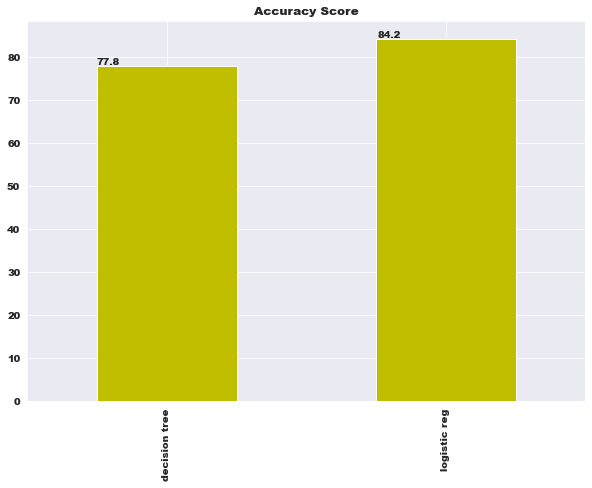

In [78]:
metric_val = {
    "accuracy score": {
    "logistic reg": accuracy_score(y_test,y_lr)*100,
    "decision tree": accuracy_score(y_test,y_dtree)*100,
    }
}

ax = pd.DataFrame(metric_val).plot(kind="bar", 
                             figsize = (10,7), 
                             legend =False, 
                             title = "Accuracy Score",
                             color = "y");
                    
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 1)), (p.get_x() * 1.005, p.get_height() * 1.005))

**Hyperparameter Tuning**

In [79]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=200, random_state=0)

space = dict()
space['solver'] = ['newton-cg', 'lbfgs']
space['penalty'] = ['l2', 'none']
space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
space['tol'] = [1e-2, 1e-3, 1e-4, 1e-5]
space['max_iter'] = [200, 400, 600]

clf = RandomizedSearchCV(logistic, space, random_state=0)
search = clf.fit(X_train_scaled, y_train)
search.best_params_

{'tol': 0.0001, 'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 600, 'C': 1}

In [80]:
lr = LogisticRegression(**search.best_params_)
lr.fit(X_train_scaled, y_train)

accuracy_score(y_test, lr.predict(X_test_scaled))

0.8417974761465066

**Model Evaluation (performance analysis)**

In [81]:
print(classification_report(y_test, lr.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     32820
           1       0.72      0.48      0.58      9417

    accuracy                           0.84     42237
   macro avg       0.79      0.71      0.74     42237
weighted avg       0.83      0.84      0.83     42237



In [82]:
from sklearn.metrics import accuracy_score
y_pred = lr.predict(X_test_scaled)
print(accuracy_score(y_pred, y_test))

0.8417974761465066
